**Batch Gradient Descent:**

 *Overview*: Uses the entire dataset to calculate the gradient of the loss function. It provides a stable convergence and produces a deterministic path towards the minimum. However, for large datasets, it can be computationally expensive due to the requirement to use all data for each update

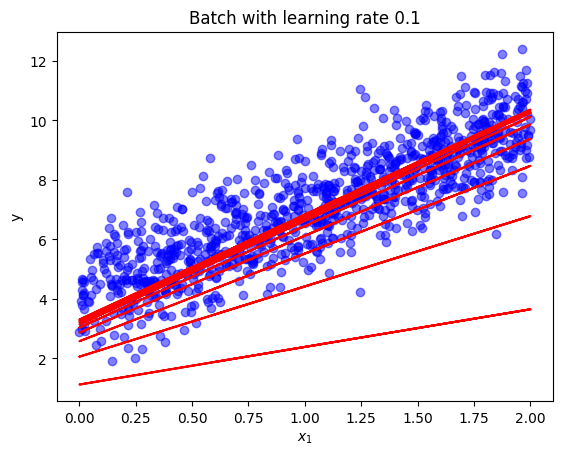

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]  # Adding bias term

def plot_gradient_descent(X, y, theta, eta, method):
    m = len(X)
    plt.scatter(X[:, 1], y, color='blue', alpha=0.5)
    n_iterations = 100
    for iteration in range(n_iterations):
        if method == "SGD":
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
        elif method == "Mini-batch":
            random_indices = np.random.choice(m, size=20, replace=False)
            xi = X[random_indices]
            yi = y[random_indices]
        else:
            xi = X
            yi = y

        gradient = -2/m * xi.T.dot(yi - xi.dot(theta))
        theta = theta - eta * gradient

        if iteration < 10:  # Plotting only first 10 lines for clarity
            y_predict = X.dot(theta)
            plt.plot(X[:, 1], y_predict, "r-")

    plt.xlabel("$x_1$")
    plt.ylabel("y")
    plt.title(f"{method} with learning rate {eta}")
    plt.show()

# Initial weights
initial_theta = np.random.randn(2,1)

# Batch Gradient Descent
plot_gradient_descent(X_b, y, initial_theta, eta=0.1, method="Batch")


**Stochastic Gradient Descent (SGD):**

Overview: Uses a single randomly selected data point to compute the gradient in each iteration. It's computationally faster and can escape local minima due to its noisier gradient. However, this noise also means that SGD will never settle at the minimum. Often, a decaying learning rate is used to reduce fluctuations.

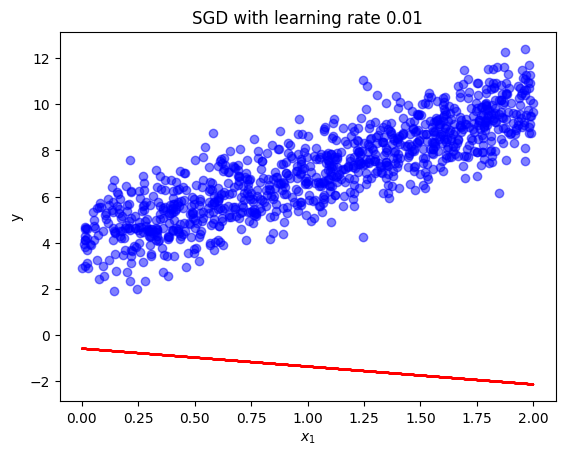

In [3]:
# Stochastic Gradient Descent
plot_gradient_descent(X_b, y, initial_theta, eta=0.01, method="SGD")

**Mini-batch Gradient Descent:**

**Overview:** A compromise between Batch and SGD. It uses a mini-batch of samples (typically 32, 64, or 128 samples) to compute the gradient. It benefits from both the computational efficiency of using random samples and the stability of using more than one data point. It's one of the most commonly used optimization methods in deep learning.

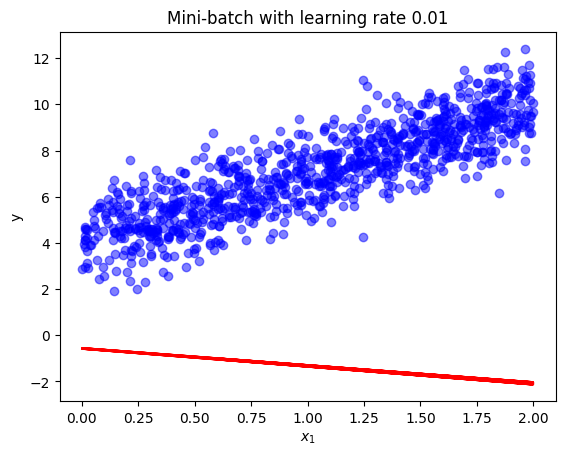

In [4]:
# Mini-batch Gradient Descent
plot_gradient_descent(X_b, y, initial_theta, eta=0.01, method="Mini-batch")